# Evaluation Exercises

In [1]:
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

import wrangle as w

In [2]:
df = w.wrangle_zillow_data()
train, validate, test = w.split_zillow_data(df)

Returning saved csv file.


In [3]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxvaluedollarcnt,taxamount,county
1174234,4,2.0,2015,1968,273762,3312.52,Ventura
892222,3,2.0,1423,1940,276396,3129.90,Orange
2056706,4,2.0,2508,1987,456054,5753.00,Ventura
666486,3,2.5,1789,1974,357041,3690.46,Orange
2068010,4,4.0,2829,1961,690548,8464.33,Los Angeles


1. Load your zillow dataset.

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of `taxvaluedollarcnt` using only `calculatedfinishedsqft`. 

In [4]:
X = train[['calculatedfinishedsquarefeet']]
y = train[['taxvaluedollarcnt']]

model = LinearRegression().fit(X, y)
predictions = model.predict(X)
predictions

array([[450782.8245175 ],
       [310186.2782192 ],
       [567867.44837741],
       ...,
       [375734.66804746],
       [295699.13409049],
       [547205.45593155]])

In [5]:
regression_df = train[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]
regression_df['taxvaluedollarcnt_prediction'] = predictions
regression_df

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_59593/414008114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_df['taxvaluedollarcnt_prediction'] = predictions


,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxvaluedollarcnt_prediction
1174234,2015,273762,450782.824518
892222,1423,276396,310186.278219
2056706,2508,456054,567867.448377
666486,1789,357041,397109.142991
2068010,2829,690548,644103.075678
...,...,...,...
421920,2834,481909,645290.546508
1204808,1366,436161,296649.110755
2002848,1699,496344,375734.668047
1731210,1362,66093,295699.134090


Make a baseline model

In [6]:
baseline = regression_df['taxvaluedollarcnt'].mean()
regression_df['baseline'] = baseline
regression_df

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_59593/1176364739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_df['baseline'] = baseline


,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxvaluedollarcnt_prediction,baseline
1174234,2015,273762,450782.824518,398120.955712
892222,1423,276396,310186.278219,398120.955712
2056706,2508,456054,567867.448377,398120.955712
666486,1789,357041,397109.142991,398120.955712
2068010,2829,690548,644103.075678,398120.955712
...,...,...,...,...
421920,2834,481909,645290.546508,398120.955712
1204808,1366,436161,296649.110755,398120.955712
2002848,1699,496344,375734.668047,398120.955712
1731210,1362,66093,295699.134090,398120.955712


3. Plot the residuals for the linear regression model that you made.

In [7]:
regression_df['residual'] = regression_df['taxvaluedollarcnt'] - regression_df['taxvaluedollarcnt_prediction']
regression_df['residual_baseline'] = regression_df['taxvaluedollarcnt'] - regression_df['baseline']
regression_df

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_59593/1338149765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_df['residual'] = regression_df['taxvaluedollarcnt'] - regression_df['taxvaluedollarcnt_prediction']
/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_59593/1338149765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_df['residual_baseline'] = regression_df['taxvaluedollarcnt'] - regression_df['baseline']


,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxvaluedollarcnt_prediction,baseline,residual,residual_baseline
1174234,2015,273762,450782.824518,398120.955712,-177020.824518,-124358.955712
892222,1423,276396,310186.278219,398120.955712,-33790.278219,-121724.955712
2056706,2508,456054,567867.448377,398120.955712,-111813.448377,57933.044288
666486,1789,357041,397109.142991,398120.955712,-40068.142991,-41079.955712
2068010,2829,690548,644103.075678,398120.955712,46444.924322,292427.044288
...,...,...,...,...,...,...
421920,2834,481909,645290.546508,398120.955712,-163381.546508,83788.044288
1204808,1366,436161,296649.110755,398120.955712,139511.889245,38040.044288
2002848,1699,496344,375734.668047,398120.955712,120609.331953,98223.044288
1731210,1362,66093,295699.134090,398120.955712,-229606.134090,-332027.955712


Unsure how to plot these. There were two ways covered in class:
- plotting the input variable of the model (`calculatedfinishedsquarefeet`) against the residual
    - this is the one covered in class.  The best should also group around $y=0$
- plotting the known variable (`taxvaluedollarcnt`) against the residual
    - in this the best prediction group around $y = 0$, this is the one implied by question 9

Text(0.5, 1.0, 'OLS model residuals')

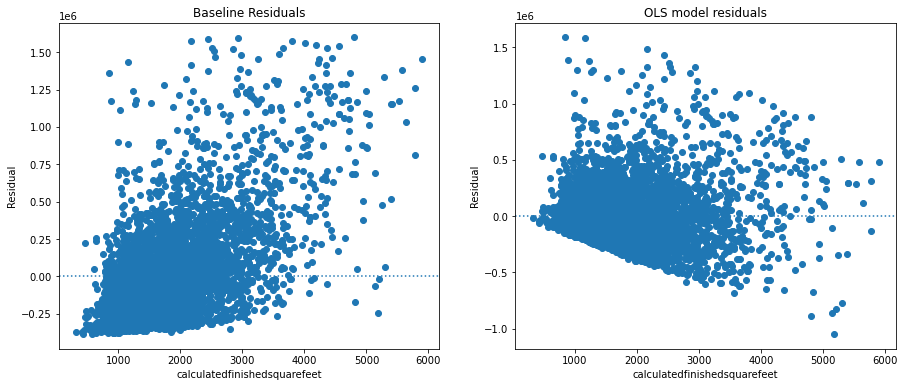

In [8]:
sample = regression_df.sample(5000) #make it load a little quicker
plt.figure(figsize = (15,6))

plt.subplot(121)
plt.scatter(sample['calculatedfinishedsquarefeet'], sample['residual_baseline'])
plt.axhline(y = 0, ls = ':')
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(sample['calculatedfinishedsquarefeet'], sample['residual'])
plt.axhline(y = 0, ls = ':')
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('Residual')
plt.title('OLS model residuals')

Text(0.5, 1.0, 'OLS model residuals')

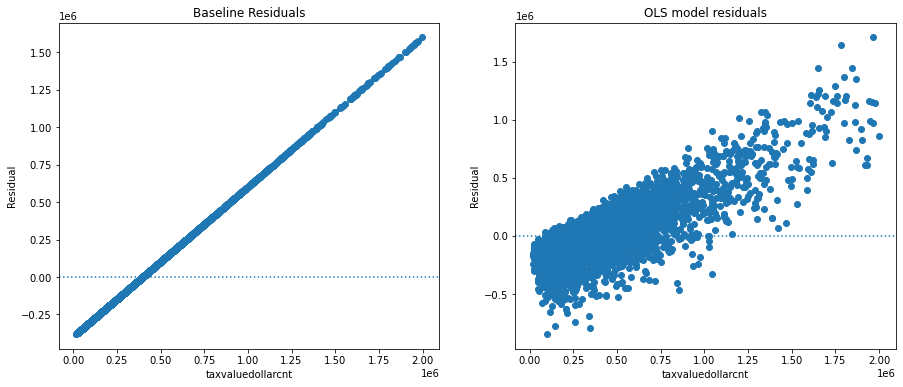

In [9]:
sample = regression_df.sample(5000) #make it load a little quicker
plt.figure(figsize = (15,6))

plt.subplot(121)
plt.scatter(sample['taxvaluedollarcnt'], sample['residual_baseline'])
plt.axhline(y = 0, ls = ':')
plt.xlabel('taxvaluedollarcnt')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(sample['taxvaluedollarcnt'], sample['residual'])
plt.axhline(y = 0, ls = ':')
plt.xlabel('taxvaluedollarcnt')
plt.ylabel('Residual')
plt.title('OLS model residuals')

In [10]:
regression_df[['residual', 'residual_baseline']].describe().T

,count,mean,std,min,25%,50%,75%,max
residual,1169019.0,-6.721008e-11,253308.897229,-1.332795e+06,-162019.970030,-31393.370216,118622.174099,1.869597e+06
residual_baseline,1169019.0,3.401545e-09,312099.364956,-3.980990e+05,-211782.455712,-76070.955712,118216.544288,1.601879e+06


4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [11]:
regression_df['residual^2'] = regression_df['residual']**2
SSE = ((regression_df['taxvaluedollarcnt'] - regression_df['taxvaluedollarcnt_prediction'])**2).sum()
f"SSE = {SSE}", regression_df['residual^2'].sum()

('SSE = 7.501050455586094e+16', 7.501050455586094e+16)

In [12]:
ESS = ((regression_df['taxvaluedollarcnt_prediction']-regression_df['taxvaluedollarcnt'].mean())**2).sum()
f"ESS = {ESS}", 

('ESS = 3.885887865757344e+16',)

In [13]:
regression_df['residual_baseline^2'] = regression_df['residual_baseline']**2
TSS = ((regression_df['taxvaluedollarcnt'] - regression_df['taxvaluedollarcnt'].mean())**2).sum()
f"TSS = {TSS}", (ESS+SSE), (ESS+SSE)==TSS

('TSS = 1.1386938321343302e+17', 1.1386938321343438e+17, False)

In [14]:
MSE = SSE/regression_df.shape[0]
f"MSE = {MSE}"

'MSE = 64165342527.24801'

In [15]:
RMSE = MSE**(0.5)
f"RMSE = {RMSE}"

'RMSE = 253308.78888670247'

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [16]:
regression_df['residual_baseline^2'] = regression_df['residual_baseline']**2
SSE_baseline = ((regression_df['taxvaluedollarcnt'] - regression_df['residual_baseline'])**2).sum()
f"SSE_baseline = {SSE_baseline}", regression_df['residual_baseline^2'].sum()

('SSE_baseline = 1.8528985680097984e+17', 1.1386938321343302e+17)

In [17]:
ESS_baseline = ((regression_df['baseline']-regression_df['taxvaluedollarcnt'].mean())**2).sum()
f"ESS_baseline = {ESS_baseline}", 

('ESS_baseline = 0.0',)

In [18]:
MSE_baseline = SSE_baseline/regression_df.shape[0]
f"MSE_baseline = {MSE_baseline}"

'MSE_baseline = 158500295376.7046'

In [19]:
RMSE_baseline = MSE_baseline**(0.5)
f"RMSE_baseline = {RMSE_baseline}"

'RMSE_baseline = 398120.95571158343'

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [20]:
pd.DataFrame([{
    'SSE_model': SSE,
    'SSE_baseline':SSE_baseline,
    'difference':SSE - SSE_baseline,
    'SSE_model < SSE_baseline': SSE < SSE_baseline
}])

,SSE_model,SSE_baseline,difference,SSE_model < SSE_baseline
0,7.501050e+16,1.852899e+17,-1.102794e+17,True


7. What is the amount of variance explained in your model?

Calculate $R^2$

In [21]:
R2 = ESS/TSS
f"R^2 = {R2}"

'R^2 = 0.3412583572595422'

In [22]:
evs = metrics.explained_variance_score(regression_df['taxvaluedollarcnt'], regression_df['taxvaluedollarcnt_prediction'])
evs

0.34125835725953024

8. Is your model better than the baseline model?

In [23]:
r_df = regression_df
model = {
    'name':'Linear Regression',
    'SSE': r_df.shape[0]*metrics.mean_squared_error(r_df['taxvaluedollarcnt'], r_df['taxvaluedollarcnt_prediction']),
    'ESS': ((r_df['taxvaluedollarcnt_prediction']-r_df['taxvaluedollarcnt'].mean())**2).sum(),
    'TSS': ((r_df['taxvaluedollarcnt'] - r_df['taxvaluedollarcnt'].mean())**2).sum(),
    'MSE': metrics.mean_squared_error(r_df['taxvaluedollarcnt'], r_df['taxvaluedollarcnt_prediction']),
    'RMSE': metrics.mean_squared_error(r_df['taxvaluedollarcnt'], r_df['taxvaluedollarcnt_prediction'])**(0.5),
    'R2':metrics.explained_variance_score(r_df['taxvaluedollarcnt'], r_df['taxvaluedollarcnt_prediction'])

}
baseline = {
    'name':'Baseline',
    'SSE': r_df.shape[0]*metrics.mean_squared_error(r_df['taxvaluedollarcnt'], r_df['baseline']),
    'ESS': ((r_df['baseline']-r_df['taxvaluedollarcnt'].mean())**2).sum(),
    'TSS': ((r_df['taxvaluedollarcnt'] - r_df['taxvaluedollarcnt'].mean())**2).sum(),
    'MSE': metrics.mean_squared_error(r_df['taxvaluedollarcnt'], r_df['baseline']),
    'RMSE': metrics.mean_squared_error(r_df['taxvaluedollarcnt'], r_df['baseline'])**(0.5),
    'R2':metrics.explained_variance_score(r_df['taxvaluedollarcnt'], r_df['baseline'])
}
pd.DataFrame([model, baseline]).set_index('name')

,SSE,ESS,TSS,MSE,RMSE,R2
name,,,,,,
Linear Regression,7.501050e+16,3.885888e+16,1.138694e+17,6.416534e+10,253308.788887,0.341258
Baseline,1.138694e+17,0.000000e+00,1.138694e+17,9.740593e+10,312099.231468,0.000000


All of the numbers for the model are lower than for the baseline.  Looks like the model is better.

9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false



In [24]:
import evaluate

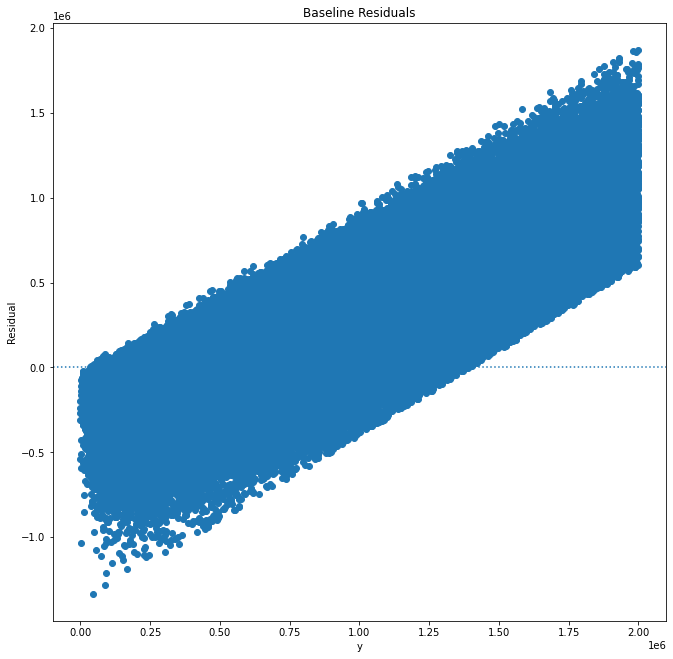

In [25]:
evaluate.plot_residuals(regression_df['taxvaluedollarcnt'], regression_df['taxvaluedollarcnt_prediction'])

In [26]:
func_return = evaluate.regression_errors(regression_df['taxvaluedollarcnt'], regression_df['taxvaluedollarcnt_prediction'])
func_return['name'] = 'function return'
pd.DataFrame([model,func_return]).set_index('name')

,SSE,ESS,TSS,MSE,RMSE,R2
name,,,,,,
Linear Regression,7.501050e+16,3.885888e+16,1.138694e+17,6.416534e+10,253308.788887,0.341258
function return,7.501050e+16,3.885888e+16,1.138694e+17,6.416534e+10,253308.788887,0.341258


In [27]:
func_return = evaluate.baseline_mean_errors(regression_df['taxvaluedollarcnt'])
func_return['name'] = 'function return'
pd.DataFrame([baseline,func_return]).set_index('name')

,SSE,ESS,TSS,MSE,RMSE,R2
name,,,,,,
Baseline,1.138694e+17,0.0,1.138694e+17,9.740593e+10,312099.231468,0.0
function return,1.138694e+17,0.0,1.138694e+17,9.740593e+10,312099.231468,0.0


In [28]:
df = evaluate.better_than_baseline(regression_df['taxvaluedollarcnt'], regression_df['taxvaluedollarcnt_prediction'])
df

,0,1,model < baseline
SSE,75010504555860944.0,113869383213433024.0,True
ESS,38858878657573440.0,0.0,False
TSS,113869383213433024.0,113869383213433024.0,False
MSE,64165342527.248009,97405930282.940674,True
RMSE,253308.788887,312099.231468,True
R2,0.341258,0.0,False
name,model,baseline,False
